In [ ]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS, TfidfVectorizer, TfidfTransformer
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import contingency_matrix
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics.cluster import homogeneity_score, completeness_score, v_measure_score, adjusted_rand_score, adjusted_mutual_info_score

from sklearn.decomposition import NMF
from scipy.optimize import linear_sum_assignment
from sklearn.metrics import confusion_matrix

from sklearn.decomposition import TruncatedSVD


Question 1

In [ ]:
categories = ['comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 
              'comp.sys.mac.hardware','rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 
              'rec.sport.hockey']

newsgroups = fetch_20newsgroups(subset='train', categories=categories, shuffle = True, remove=('headers', 'footers'), random_state = 42)

In [ ]:
vectorizer = TfidfVectorizer(min_df=3,stop_words='english')
newsgroup_tfidf = vectorizer.fit_transform(newsgroups.data) 

print('Shape of TF-IDF matrix:  ',newsgroup_tfidf.shape)

Shape of TF-IDF matrix:   (4732, 17131)


Question 2

In [ ]:
kmeans = KMeans(n_clusters=2, n_init = 30, max_iter = 1000, random_state=0).fit(newsgroup_tfidf)

In [ ]:
class_kmeans = []
for label in newsgroups.target:
    if label in [0, 1, 2, 3]:
        class_kmeans.append(0)
    else:
        class_kmeans.append(1)
contingency_table = contingency_matrix(class_kmeans, kmeans.labels_)
print('Contingency Table:  ', '\n', contingency_table)

Contingency Table:   
 [[1941  402]
 [  42 2347]]


In [ ]:
##plotmat.py
import itertools
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
def plot_mat(mat, xticklabels = None, yticklabels = None, pic_fname = None, size=(-
1,-1), if_show_values = True,
             colorbar = True, grid = 'k', xlabel = None, ylabel = None, title = 
None, vmin=None, vmax=None):
    if size == (-1, -1):
        size = (mat.shape[1] / 3, mat.shape[0] / 3)
    fig = plt.figure(figsize=size)
    ax = fig.add_subplot(1,1,1)
    # im = ax.imshow(mat, cmap=plt.cm.Blues)
    im = ax.pcolor(mat, cmap=plt.cm.Blues, linestyle='-', linewidth=0.5, 
edgecolor=grid, vmin=vmin, vmax=vmax)
    
    if colorbar:
        plt.colorbar(im,fraction=0.046, pad=0.06)
    # tick_marks = np.arange(len(classes))
    # Ticks
    lda_num_topics = mat.shape[0]
    nmf_num_topics = mat.shape[1]
    yticks = np.arange(lda_num_topics)
    xticks = np.arange(nmf_num_topics)
    ax.set_xticks(xticks + 0.5)
    ax.set_yticks(yticks + 0.5)
    if xticklabels is None:
        xticklabels = [str(i) for i in xticks]
    if yticklabels is None:
        yticklabels = [str(i) for i in yticks]
    ax.set_xticklabels(xticklabels)
    ax.set_yticklabels(yticklabels)
    # Minor ticks
    # ax.set_xticks(xticks, minor=True);
    # ax.set_yticks(yticks, minor=True);
    # ax.set_xticklabels([], minor=True)
    # ax.set_yticklabels([], minor=True)
    # ax.grid(which='minor', color='k', linestyle='-', linewidth=0.5)
    # tick labels on all four sides
    ax.tick_params(labelright = True, labeltop = False)
    if ylabel:
        plt.ylabel(ylabel, fontsize=15)
    if xlabel:
        plt.xlabel(xlabel, fontsize=15)
    if title:
        plt.title(title, fontsize=15)
    # im = ax.imshow(mat, interpolation='nearest', cmap=plt.cm.Blues)
    ax.invert_yaxis()
    # thresh = mat.max() / 2
    def show_values(pc, fmt="%.3f", **kw):
        pc.update_scalarmappable()
        ax = pc.axes
        for p, color, value in itertools.zip_longest(pc.get_paths(), 
pc.get_facecolors(), pc.get_array()):
            x, y = p.vertices[:-2, :].mean(0)
            if np.all(color[:3] > 0.5):
                color = (0.0, 0.0, 0.0)
            else:
                color = (1.0, 1.0, 1.0)
            ax.text(x, y, fmt % value, ha="center", va="center", color=color, **kw,
fontsize=10)
    if if_show_values:
        show_values(im)
    # for i, j in itertools.product(range(mat.shape[0]), range(mat.shape[1])):
    #     ax.text(j, i, "{:.2f}".format(mat[i, j]), fontsize = 4,
    #              horizontalalignment="center",
    #              color="white" if mat[i, j] > thresh else "black")
    plt.tight_layout()
    if pic_fname:
        plt.savefig(pic_fname, dpi=300, transparent=True)
    plt.show()
    plt.close()

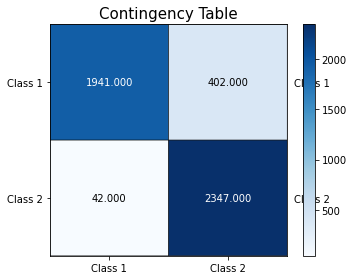

In [ ]:
plot_mat(contingency_table, xticklabels = ['Class 1', 'Class 2'], yticklabels = ['Class 1', 'Class 2'], size = (5,4), title = 'Contingency Table')

Question 3

In [ ]:
print('Homogeneity score:', homogeneity_score(class_kmeans, kmeans.labels_))
print('Completeness score:', completeness_score(class_kmeans, kmeans.labels_))
print('V-measure score:', v_measure_score(class_kmeans, kmeans.labels_))
print('Adjusted Rand Index:', adjusted_rand_score(class_kmeans, kmeans.labels_))
print('Adjusted mutual information score:', adjusted_mutual_info_score(class_kmeans, kmeans.labels_))

Homogeneity score: 0.5891851383382101
Completeness score: 0.6005467399371613
V-measure score: 0.5948116891031819
Adjusted Rand Index: 0.6598278657872265
Adjusted mutual information score: 0.5947492978713683


Question 4

In [ ]:
from sklearn.decomposition import TruncatedSVD

x = np.array(range(1, 1001))
svd = TruncatedSVD(n_components = 1000, random_state=42)
svd.fit(newsgroup_tfidf)
ratio = svd.explained_variance_ratio_.cumsum()
    

Text(0, 0.5, 'Percentage of Variance')

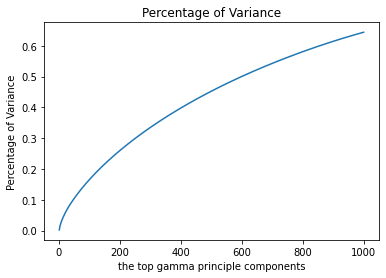

In [ ]:
plt.plot(x, ratio)
plt.title('Percentage of Variance')
plt.xlabel('the top gamma principle components')
plt.ylabel('Percentage of Variance')

Question5

In [ ]:
#SVD

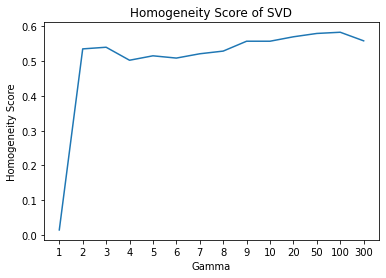

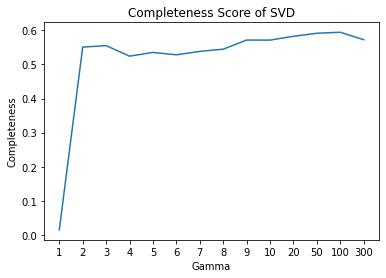

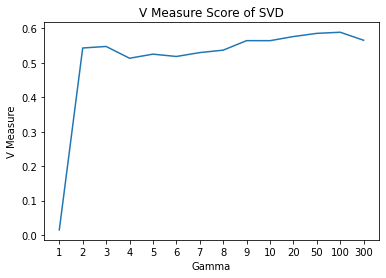

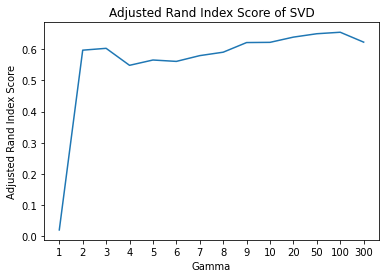

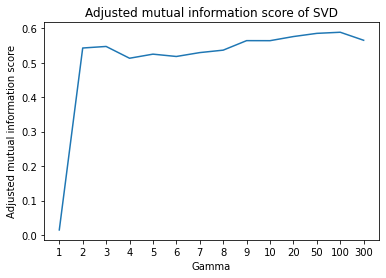

In [ ]:
gamma = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 50, 100, 300]
homogeneity_svd = []
completeness_svd = []
v_measure_svd = []
adjusted_rand_svd = []
adjusted_mutual_info_svd = []
for i in gamma:
    svd_q5 = TruncatedSVD(n_components = i, random_state=42)
    kmeans.fit(svd_q5.fit_transform(newsgroup_tfidf))   
    homogeneity_svd.append(homogeneity_score(class_kmeans, kmeans.labels_))
    completeness_svd.append(completeness_score(class_kmeans, kmeans.labels_))
    v_measure_svd.append(v_measure_score(class_kmeans, kmeans.labels_))
    adjusted_rand_svd.append(adjusted_rand_score(class_kmeans, kmeans.labels_))
    adjusted_mutual_info_svd.append(adjusted_mutual_info_score(class_kmeans, kmeans.labels_))


gamma_xlabel = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '20', '50', '100', '300']    
plt.plot(gamma_xlabel,homogeneity_svd)
plt.title('Homogeneity Score of SVD')
plt.xlabel('Gamma')
plt.ylabel('Homogeneity Score')
plt.show()

plt.plot(gamma_xlabel,completeness_svd)
plt.title('Completeness Score of SVD')
plt.xlabel('Gamma')
plt.ylabel('Completeness')
plt.show() 

plt.plot(gamma_xlabel,v_measure_svd)
plt.title('V Measure Score of SVD')
plt.xlabel('Gamma')
plt.ylabel('V Measure')
plt.show() 

plt.plot(gamma_xlabel,adjusted_rand_svd)
plt.title('Adjusted Rand Index Score of SVD')
plt.xlabel('Gamma')
plt.ylabel('Adjusted Rand Index Score')
plt.show() 

plt.plot(gamma_xlabel,adjusted_mutual_info_svd)
plt.title('Adjusted mutual information score of SVD')
plt.xlabel('Gamma')
plt.ylabel('Adjusted mutual information score')
plt.show() 



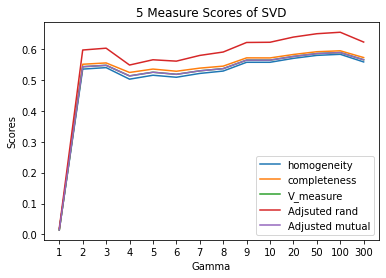

In [ ]:
plt.plot(gamma_xlabel,homogeneity_svd)
plt.plot(gamma_xlabel,completeness_svd)
plt.plot(gamma_xlabel,v_measure_svd)
plt.plot(gamma_xlabel,adjusted_rand_svd)
plt.plot(gamma_xlabel,adjusted_mutual_info_svd)
plt.title('5 Measure Scores of SVD')
plt.xlabel('Gamma')
plt.ylabel('Scores')
plt.legend(labels = ['homogeneity','completeness','V_measure','Adjsuted rand','Adjusted mutual'])
plt.show() 



In [ ]:
print("Best Gamma for SVD is 50")

Best Gamma for SVD is 50


In [ ]:
#NMF

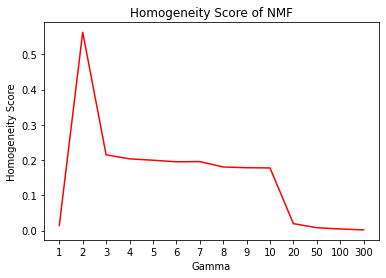

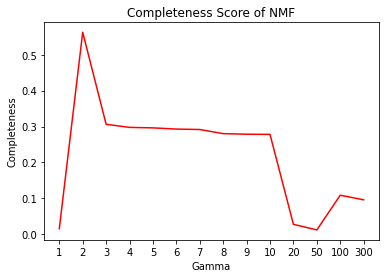

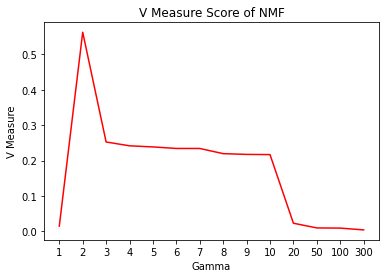

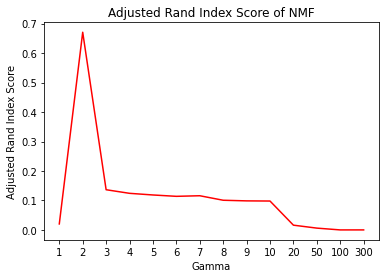

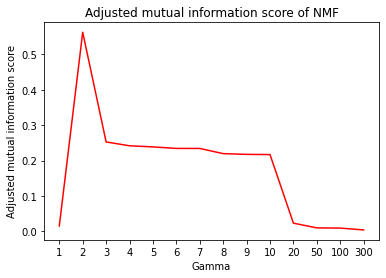

In [ ]:
from sklearn.decomposition import NMF

homogeneity_nmf = []
completeness_nmf = []
v_measure_nmf = []
adjusted_rand_nmf = []
adjusted_mutual_info_nmf = []
for i in gamma:
    nmf_q5 = NMF(n_components = i,init='random', random_state=42, max_iter = 500)
    kmeans.fit(nmf_q5.fit_transform(newsgroup_tfidf))   
    homogeneity_nmf.append(homogeneity_score(class_kmeans, kmeans.labels_))
    completeness_nmf.append(completeness_score(class_kmeans, kmeans.labels_))
    v_measure_nmf.append(v_measure_score(class_kmeans, kmeans.labels_))
    adjusted_rand_nmf.append(adjusted_rand_score(class_kmeans, kmeans.labels_))
    adjusted_mutual_info_nmf.append(adjusted_mutual_info_score(class_kmeans, kmeans.labels_))


plt.plot(gamma_xlabel,homogeneity_nmf, 'r')
plt.title('Homogeneity Score of NMF')
plt.xlabel('Gamma')
plt.ylabel('Homogeneity Score')
plt.show()

plt.plot(gamma_xlabel,completeness_nmf, 'r')
plt.title('Completeness Score of NMF')
plt.xlabel('Gamma')
plt.ylabel('Completeness')
plt.show() 

plt.plot(gamma_xlabel,v_measure_nmf, 'r')
plt.title('V Measure Score of NMF')
plt.xlabel('Gamma')
plt.ylabel('V Measure')
plt.show() 

plt.plot(gamma_xlabel,adjusted_rand_nmf, 'r')
plt.title('Adjusted Rand Index Score of NMF')
plt.xlabel('Gamma')
plt.ylabel('Adjusted Rand Index Score')
plt.show() 

plt.plot(gamma_xlabel,adjusted_mutual_info_nmf, 'r')
plt.title('Adjusted mutual information score of NMF')
plt.xlabel('Gamma')
plt.ylabel('Adjusted mutual information score')
plt.show() 



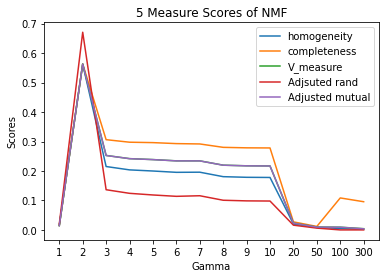

In [ ]:
plt.plot(gamma_xlabel,homogeneity_nmf)
plt.plot(gamma_xlabel,completeness_nmf)
plt.plot(gamma_xlabel,v_measure_nmf)
plt.plot(gamma_xlabel,adjusted_rand_nmf)
plt.plot(gamma_xlabel,adjusted_mutual_info_nmf)
plt.title('5 Measure Scores of NMF')
plt.xlabel('Gamma')
plt.ylabel('Scores')
plt.legend(labels = ['homogeneity','completeness',
                     'V_measure','Adjsuted rand','Adjusted mutual'])
plt.show() 



In [ ]:
print("Best Gamma for NMF is 2")

Best Gamma for NMF is 2


Question 8

In [ ]:
svd8 = TruncatedSVD(n_components = 50, random_state=42)
svd_trans = svd8.fit_transform(newsgroup_tfidf)

nmf8 = NMF(n_components = 2, random_state=42, init='random', max_iter = 500)
nmf_trans = nmf8.fit_transform(newsgroup_tfidf)

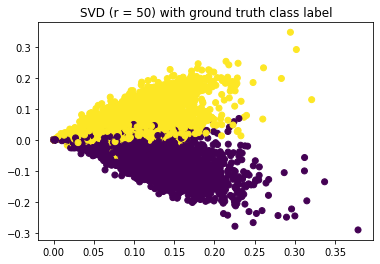

Text(0.5, 1.0, 'SVD (r = 50) with clustering label')

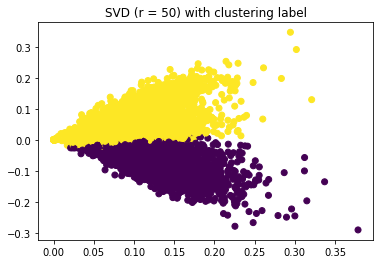

In [ ]:
plt.scatter(svd_trans[:,0],svd_trans[:,1],c=class_kmeans)
plt.title("SVD (r = 50) with ground truth class label")
plt.show()
plt.scatter(svd_trans[:,0],svd_trans[:,1],c=kmeans.labels_)
plt.title("SVD (r = 50) with clustering label")



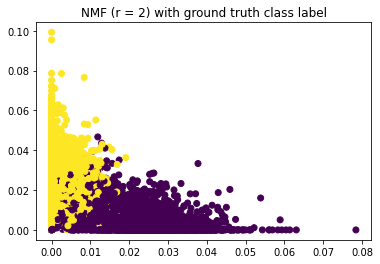

Text(0.5, 1.0, 'NMF (r = 2) with clustering label')

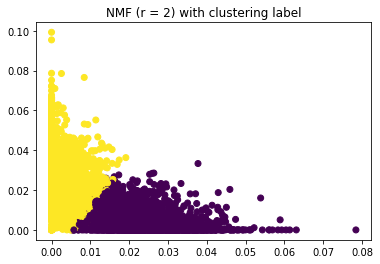

In [ ]:
plt.scatter(nmf_trans[:,0],nmf_trans[:,1],c=class_kmeans)
plt.title("NMF (r = 2) with ground truth class label")
plt.show()
plt.scatter(nmf_trans[:,0],nmf_trans[:,1],c=kmeans.labels_)
plt.title("NMF (r = 2) with clustering label")

Question 9

Question 10

In [ ]:
def five_metrics(y, y_pred):
    return (homogeneity_score(y, y_pred), completeness_score(y, y_pred), v_measure_score(y, y_pred), 
            adjusted_rand_score(y, y_pred), adjusted_mutual_info_score(y, y_pred))

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
newsgroups10 = fetch_20newsgroups(subset='train', shuffle = True, remove=('headers', 'footers'), random_state = 42)
# tfidf 
vectorizer = TfidfVectorizer(min_df=3,stop_words='english')
newsgroup10_tfidf = vectorizer.fit_transform(newsgroups10.data)

In [ ]:
# dimensionality reduction
kmeans = KMeans(n_clusters=20, max_iter=1000, n_init=30, random_state=0)
r = [1,2,3,4,5,6,7,8,9,10,20,50,100,300]
metrics_svds = []
for i in r:
    print(i)
    svd =  TruncatedSVD(n_components = i, random_state=42)
    svd_trans = svd.fit_transform(newsgroup10_tfidf)
    kmeans.fit(svd_trans)
    metrics_svds.append(five_metrics(newsgroups10.target, kmeans.labels_))

1
2
3
4
5
6
7
8
9
10
20
50
100
300


In [ ]:
metrics_sums = [i[2] for i in metrics_svds]
best_r = r[metrics_sums.index(max(metrics_sums))]
best_r

100

In [ ]:
metrics_nmf = []
for i in r:
    print(i)
    nmf = NMF(n_components = i, random_state=42, init='random', max_iter = 500)
    nmf_trans = nmf.fit_transform(newsgroup10_tfidf)
    kmeans.fit(nmf_trans)
    metrics_nmf.append(five_metrics(newsgroups10.target, kmeans.labels_))

1
2
3
4
5
6
7
8
9
10
20
50
100
300


In [ ]:
metrics_sums = [i[2] for i in metrics_nmf]
best_r = r[metrics_sums.index(max(metrics_sums))]
best_r

20

In [ ]:
svd =  TruncatedSVD(n_components = 100, random_state=42)
svd_trans = svd.fit_transform(newsgroup10_tfidf)

nmf = NMF(n_components = 20, random_state=42, init='nndsvda')
nmf_trans = nmf.fit_transform(newsgroup10_tfidf)

In [ ]:
kmeans_svd = KMeans(n_clusters=20, max_iter=1000, n_init=30, random_state=0)
kmeans_nmf = KMeans(n_clusters=20, max_iter=1000, n_init=30, random_state=0)

kmeans_svd.fit_transform(svd_trans)
kmeans_nmf.fit_transform(nmf_trans)

print("Five metrics of SVD (r = 100) and Kmeans: ")
metrics_svd = five_metrics(newsgroups10.target, kmeans_svd.labels_)
print('Homogeneity score:', metrics_svd[0])
print('Completeness score:', metrics_svd[1])
print('V-measure score:', metrics_svd[2])
print('Adjusted Rand Index:', metrics_svd[3])
print('Adjusted mutual information score:', metrics_svd[4])

print('\n')
print("Five metrics of NMF (r = 20) and Kmeans: ")
metrics_nmf = five_metrics(newsgroups10.target, kmeans_nmf.labels_)
print('Homogeneity score:', metrics_nmf[0])
print('Completeness score:', metrics_nmf[1])
print('V-measure score:', metrics_nmf[2])
print('Adjusted Rand Index:', metrics_nmf[3])
print('Adjusted mutual information score:', metrics_nmf[4])




Five metrics of SVD (r = 100) and Kmeans: 
Homogeneity score: 0.3481790157450268
Completeness score: 0.43672992505554603
V-measure score: 0.3874594556080469
Adjusted Rand Index: 0.10407635871721183
Adjusted mutual information score: 0.3836900781577761


Five metrics of NMF (r = 20) and Kmeans: 
Homogeneity score: 0.3129780843369182
Completeness score: 0.38176358533484084
V-measure score: 0.34396565176274485
Adjusted Rand Index: 0.0832778217401842
Adjusted mutual information score: 0.3400266095117571


Contingency Matrix of Kmeans with SVD (r = 100)


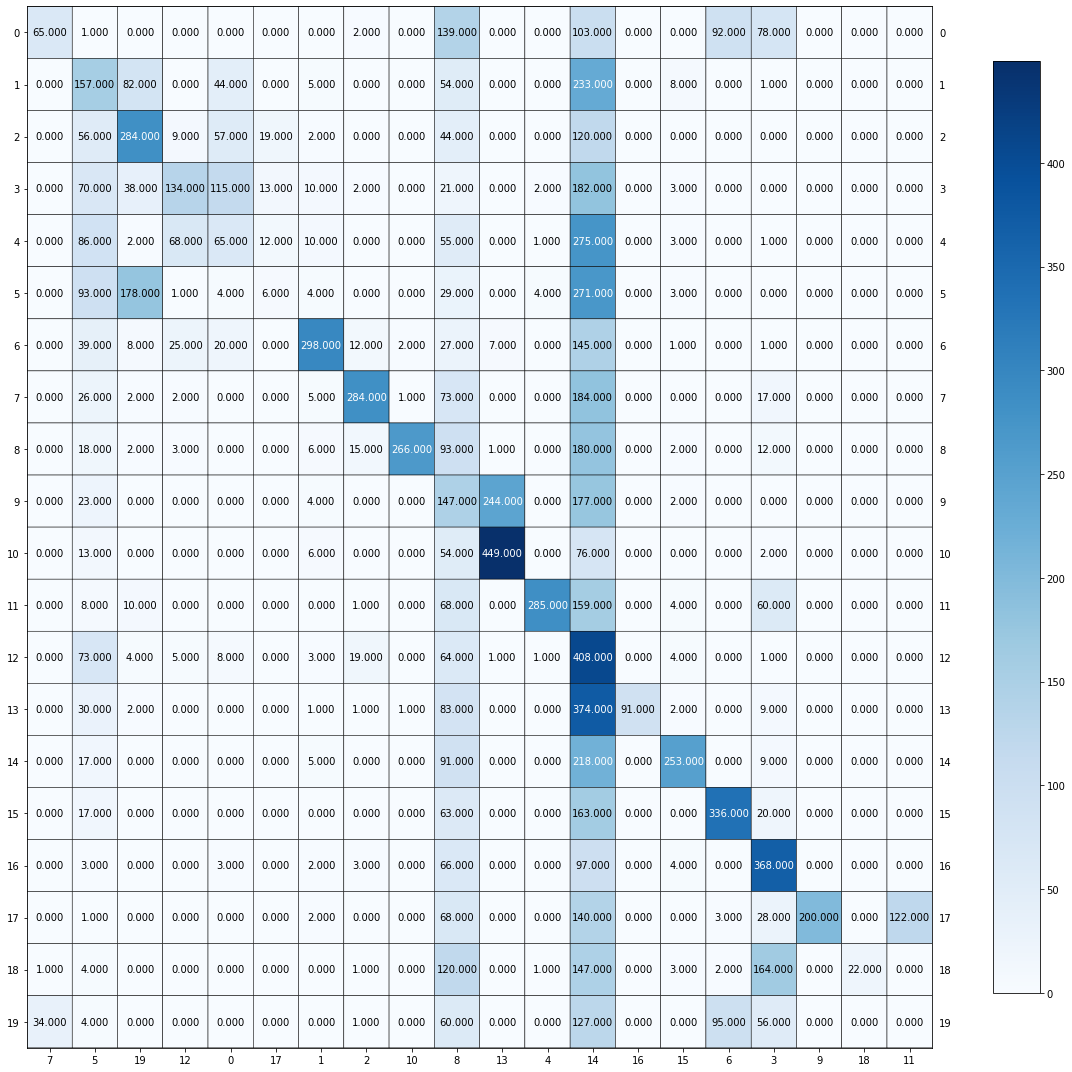

In [ ]:
print("Contingency Matrix of Kmeans with SVD (r = 100)")
cm = confusion_matrix(newsgroups10.target, kmeans_svd.labels_)
rows, cols = linear_sum_assignment(cm, maximize=True)
plot_mat(cm[rows[:, np.newaxis], cols], xticklabels=cols, yticklabels=rows, size=(15,15))



Contingency Matrix of Kmeans with NMF (r = 20)


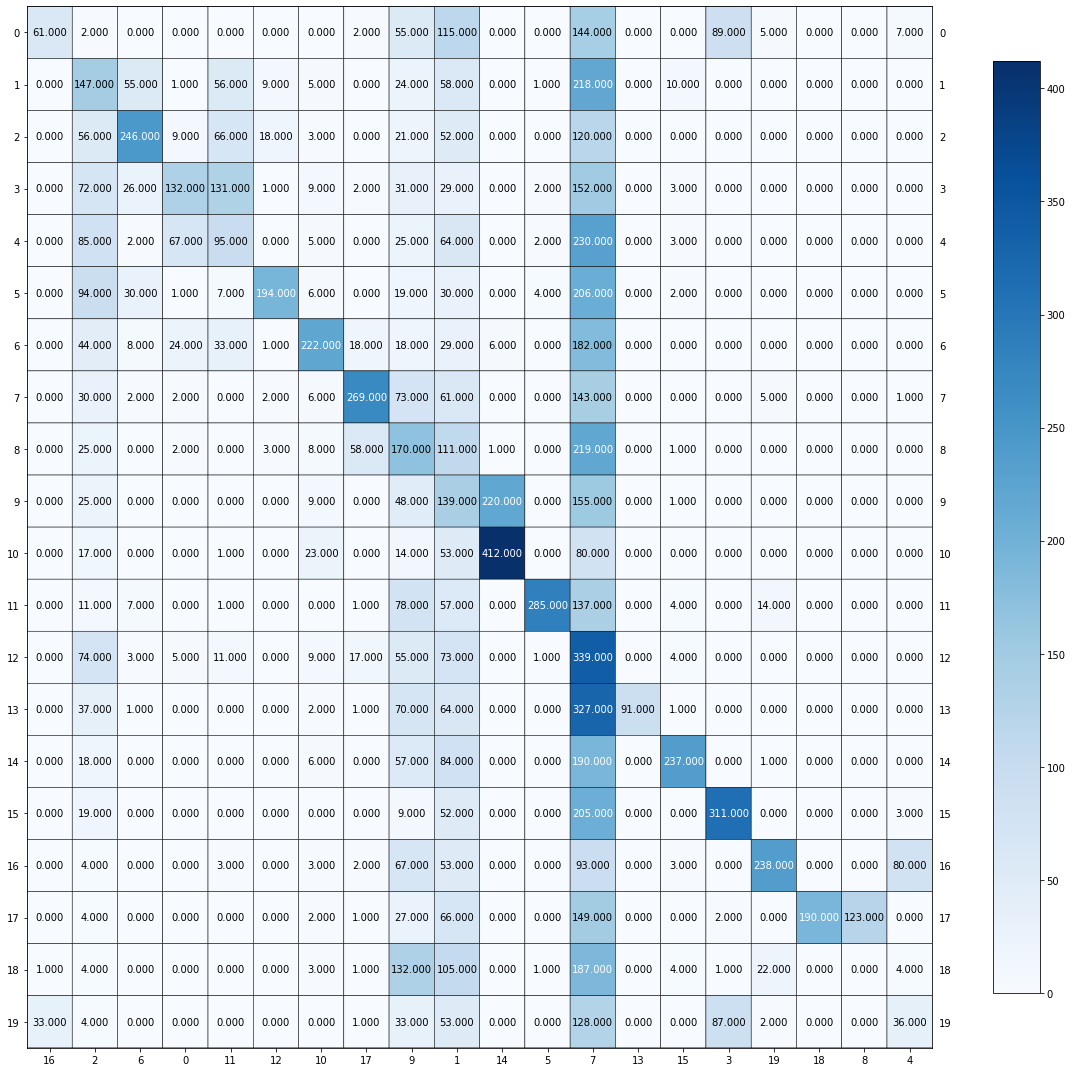

In [ ]:
print("Contingency Matrix of Kmeans with NMF (r = 20)")
cm = confusion_matrix(newsgroups10.target, kmeans_nmf.labels_)
rows, cols = linear_sum_assignment(cm, maximize=True)
plot_mat(cm[rows[:, np.newaxis], cols], xticklabels=cols, yticklabels=rows, size=(15,15))

### Question 11

In [ ]:
pip install umap

In [ ]:
pip install umap-learn

In [ ]:
pip install umap-learn[plot]

In [ ]:
import umap.umap_ as umap
import umap.plot

In [ ]:
newsgroups11 = fetch_20newsgroups(subset='all', shuffle = True, remove=('headers', 'footers'), random_state = 42)
newsgroup_tfidf11 = vectorizer.fit_transform(newsgroups11.data) 
y11 = [x for x in newsgroups11.target]

In [ ]:
n_components_list = [5,20,200]
kmeans20 = KMeans(n_clusters=20, n_init = 30, max_iter = 1000, random_state=0)

In [ ]:
def five_metrics(y, y_pred):
    return (homogeneity_score(y, y_pred), completeness_score(y, y_pred), v_measure_score(y, y_pred), 
            adjusted_rand_score(y, y_pred), adjusted_mutual_info_score(y, y_pred))

UMAP Using Cosine

n_components: 5
Homogeneity: 0.5536170181239092
Completeness: 0.5815119290398264
V-measure:    0.5672217257130238
Adjusted Rand: 0.43254583754418924
Adjusted Mutual Info: 0.5657769857215428
contingency matrix for n_components 5 cosine


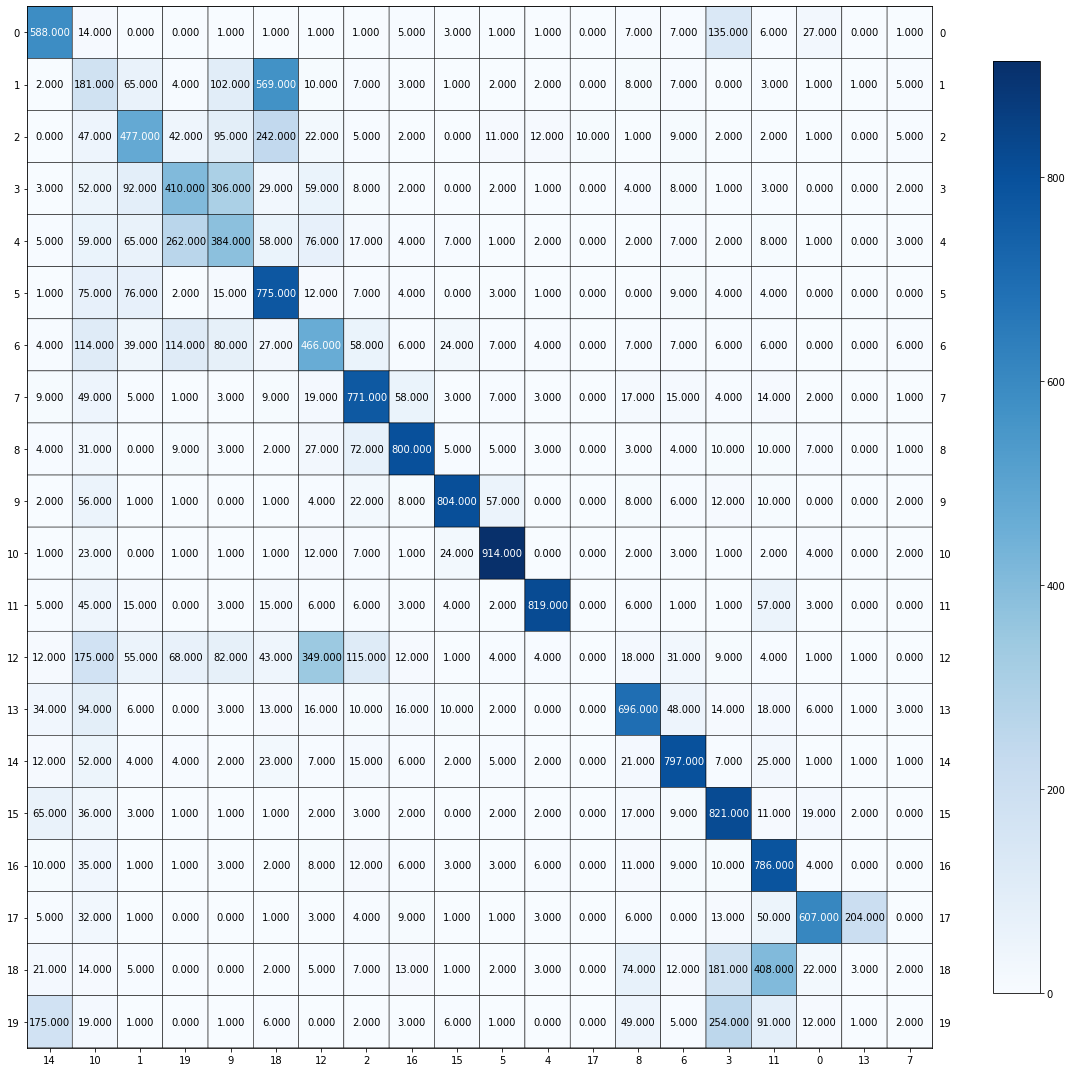

n_components: 20
Homogeneity: 0.559359921750688
Completeness: 0.5993956233241645
V-measure:    0.5786861437433751
Adjusted Rand: 0.4265692800771772
Adjusted Mutual Info: 0.5772641951662884
contingency matrix for n_components 20 cosine


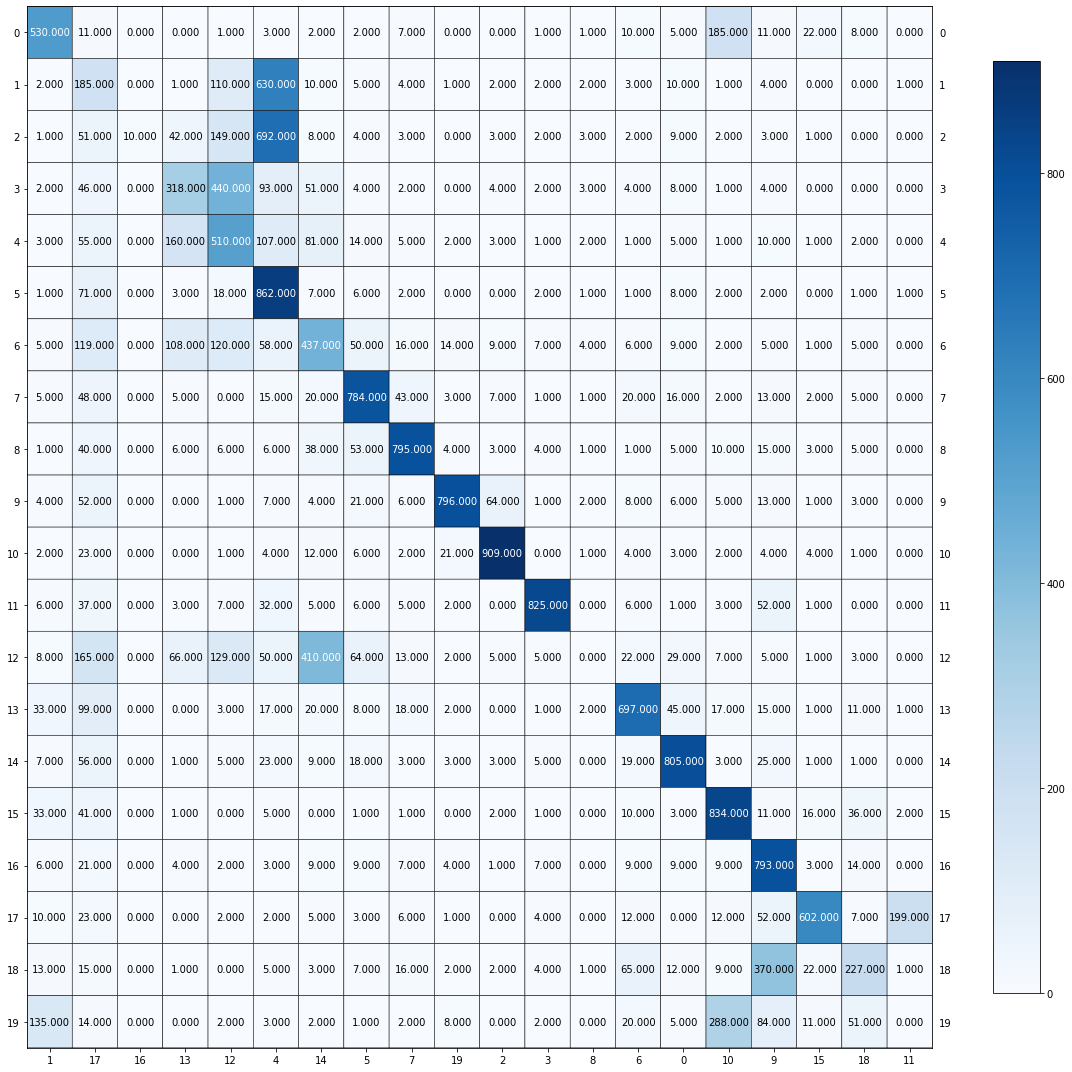

n_components: 200
Homogeneity: 0.5674212507901467
Completeness: 0.6028550682325439
V-measure:    0.5846017240566872
Adjusted Rand: 0.44416365242549255
Adjusted Mutual Info: 0.5832068563047608
contingency matrix for n_components 200 cosine


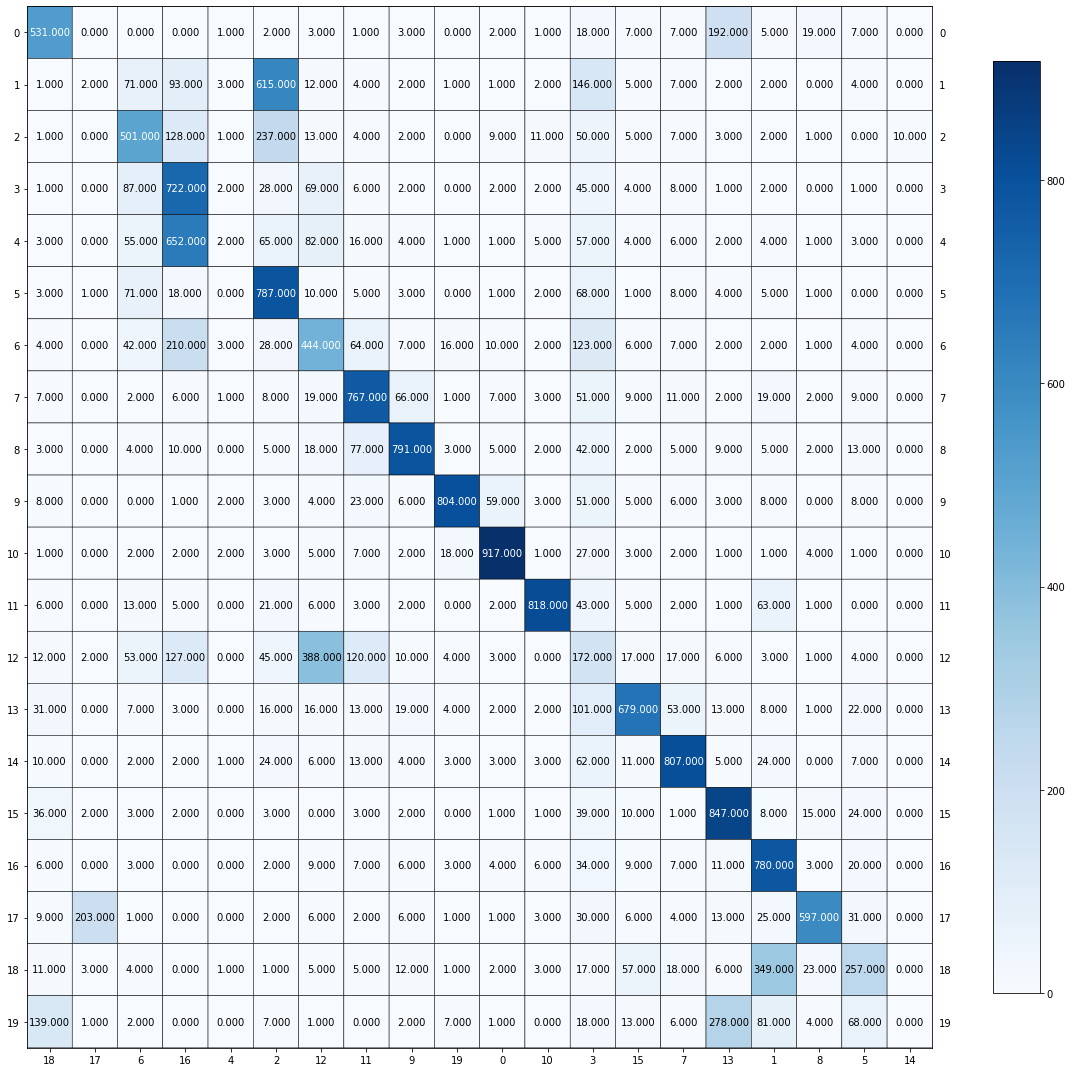

In [ ]:
for n_components in n_components_list:
    umap_u = umap.UMAP(n_components = n_components, metric = 'cosine') 
    umap_embedding = umap_u.fit_transform(newsgroup_tfidf11)

    y_pred = kmeans20.fit_predict(umap_embedding)

    m = five_metrics(y11, y_pred)

    print("n_components: {}".format(n_components))
    print("Homogeneity: {}".format(m[0]))
    print("Completeness: {}".format(m[1]))
    print("V-measure:    {}".format(m[2]))
    print("Adjusted Rand: {}".format(m[3]))
    print("Adjusted Mutual Info: {}".format(m[4]))

    print('contingency matrix for n_components {} cosine'.format(n_components))
    umap_cm = contingency_matrix(y11, y_pred)
    rows, cols = linear_sum_assignment(umap_cm, maximize = True)
    plot_mat(umap_cm[rows[:, np.newaxis], cols], xticklabels=cols, yticklabels=rows, size=(15,15))


UMAP Using Euclidean Distance

n_components: 5
Homogeneity: 0.007089005657433596
Completeness: 0.0072283734041688665
V-measure:    0.007158011216399325
Adjusted Rand: 0.0007939862844409275
Adjusted Mutual Info: 0.0039194294902962
contingency matrix for n_components 5 euclidean


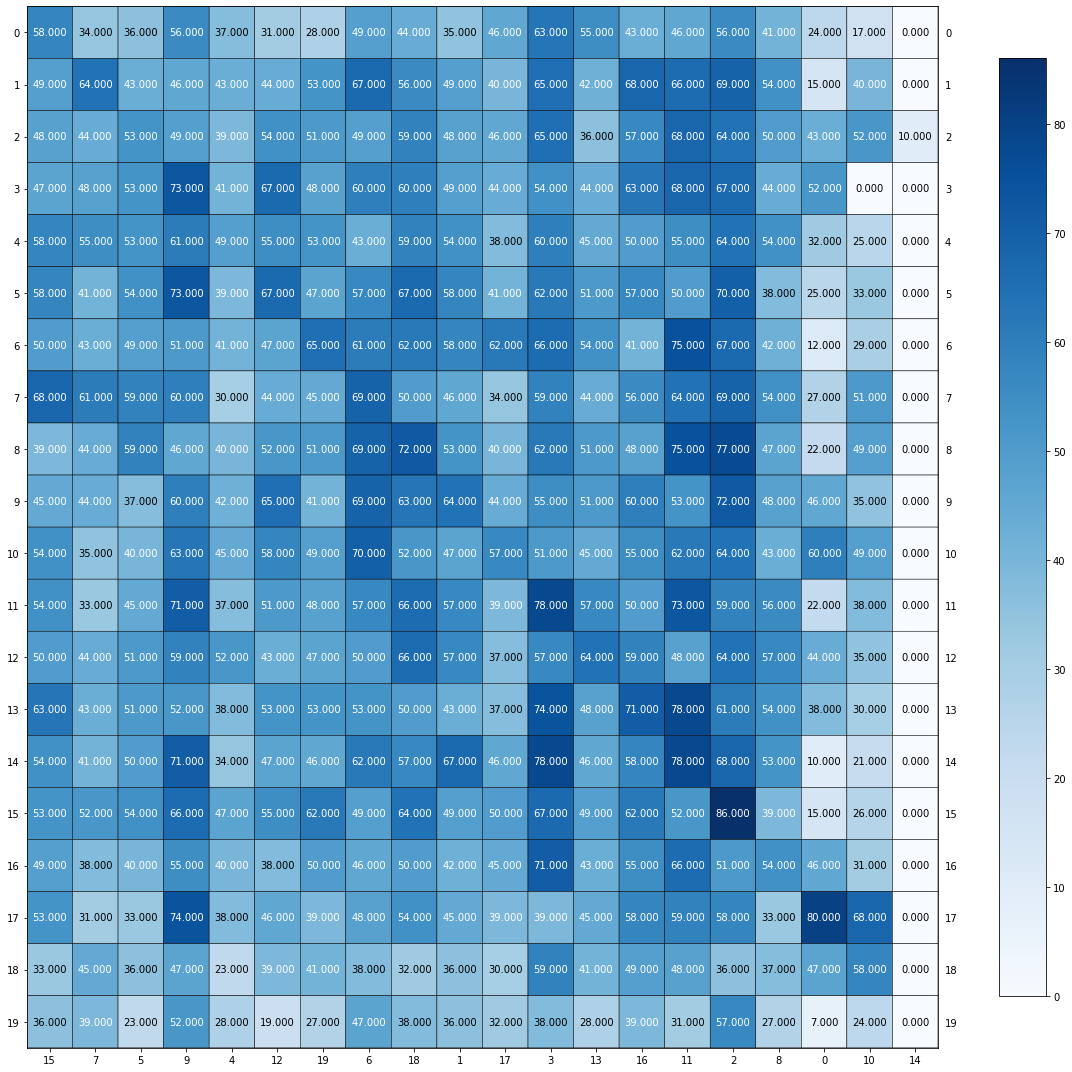

n_components: 20
Homogeneity: 0.007567332524990324
Completeness: 0.007850943053374446
V-measure:    0.007706529360911613
Adjusted Rand: 0.0009046138364357903
Adjusted Mutual Info: 0.004423879122070482
contingency matrix for n_components 20 euclidean


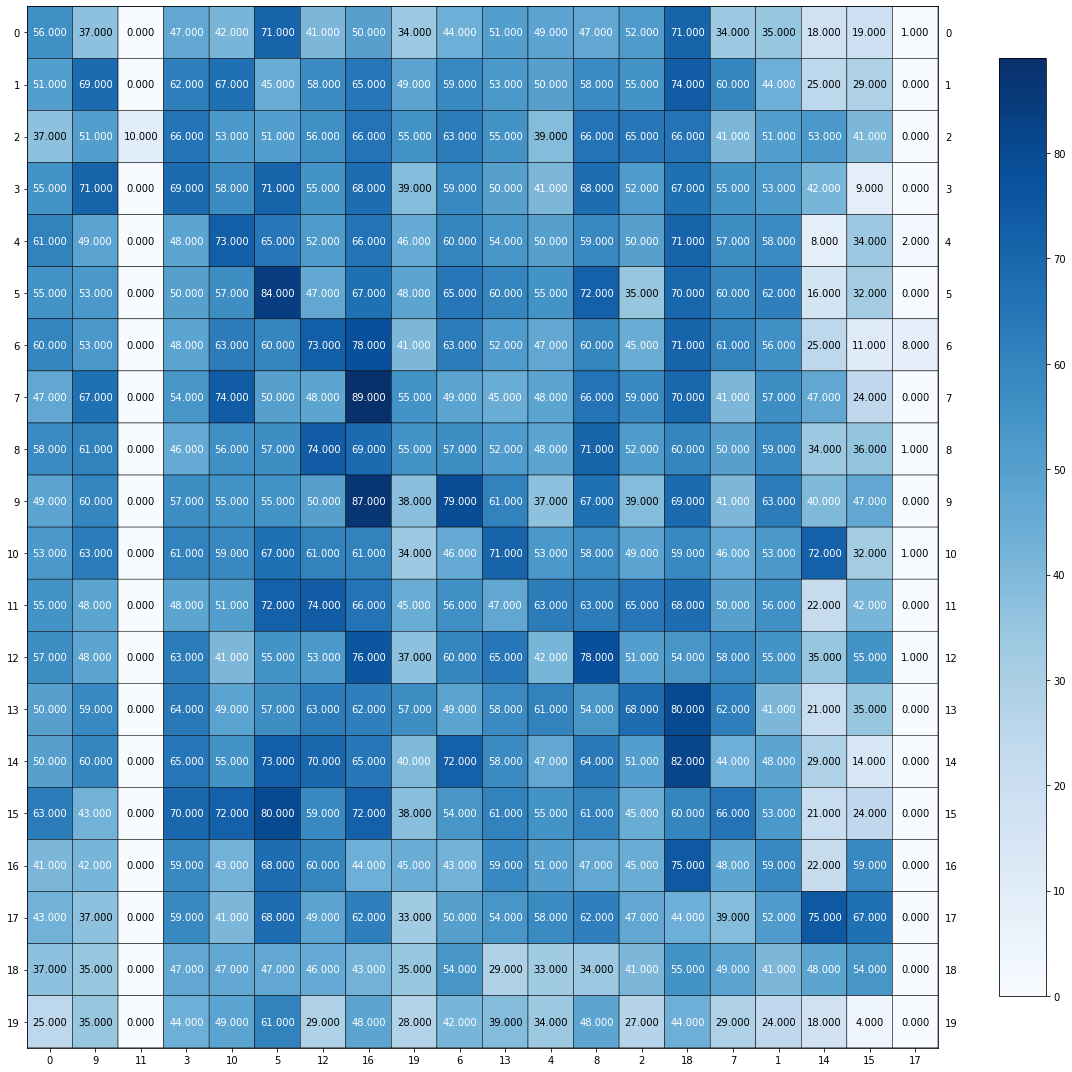

n_components: 200
Homogeneity: 0.005610989412677675
Completeness: 0.0058057914403260805
V-measure:    0.005706728494365992
Adjusted Rand: 0.0007404422574177884
Adjusted Mutual Info: 0.002447955529949351
contingency matrix for n_components 200 euclidean


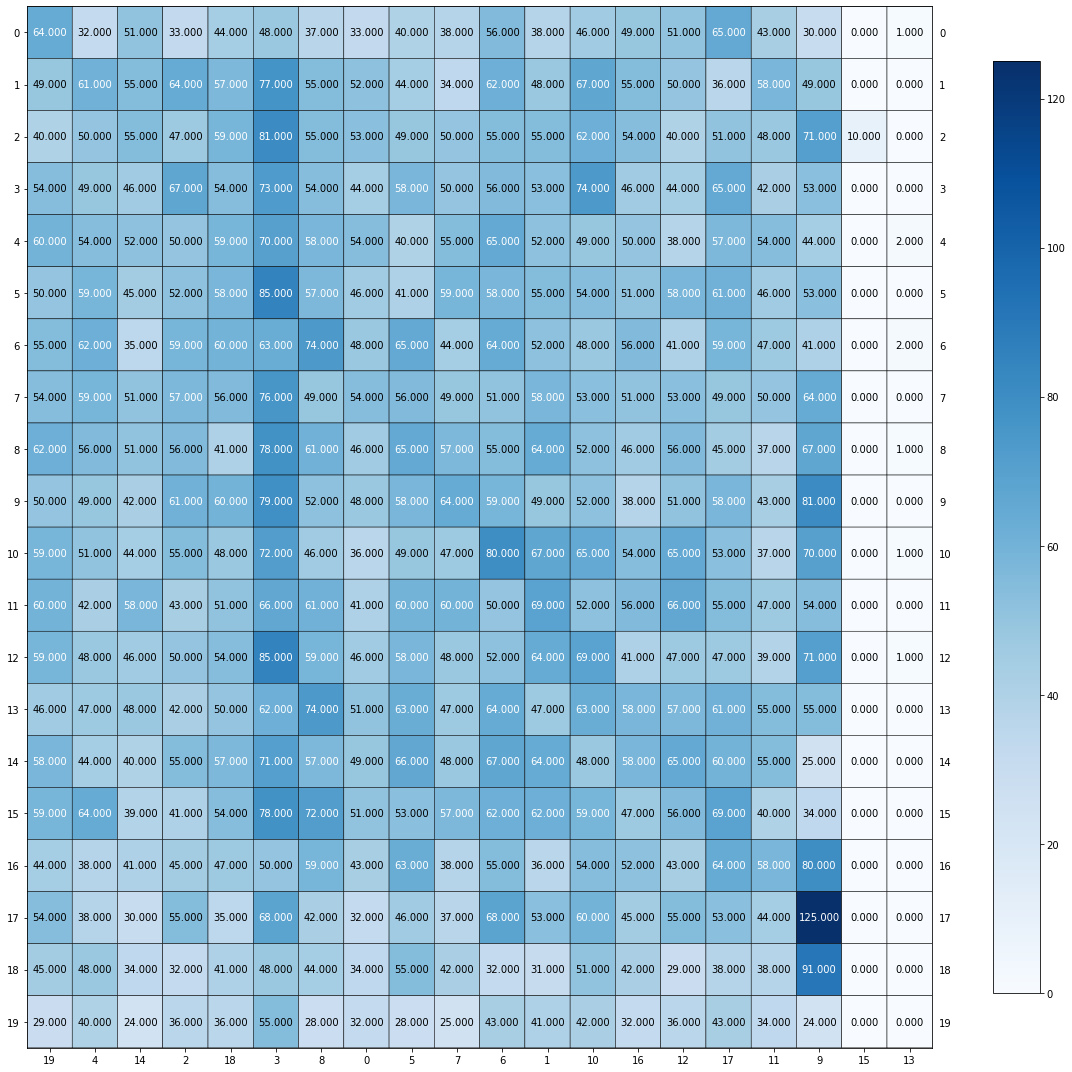

In [ ]:
for n_component in n_components_list:
    umap_u = umap.UMAP(n_components = n_component, metric = 'euclidean') 
    umap_embedding = umap_u.fit_transform(newsgroup_tfidf11)

    y_pred = kmeans20.fit_predict(umap_embedding)
    m_euc = five_metrics(y11, y_pred)

    print("n_components: {}".format(n_component))
    print("Homogeneity: {}".format(m_euc[0]))
    print("Completeness: {}".format(m_euc[1]))
    print("V-measure:    {}".format(m_euc[2]))
    print("Adjusted Rand: {}".format(m_euc[3]))
    print("Adjusted Mutual Info: {}".format(m_euc[4]))

    print('contingency matrix for n_components {} euclidean'.format(n_component))
    umap_cm = contingency_matrix(y11, y_pred)
    rows, cols = linear_sum_assignment(umap_cm, maximize = True)
    plot_mat(umap_cm[rows[:, np.newaxis], cols], xticklabels=cols, yticklabels=rows, size=(15,15))

### Question 12

### Question 13:

In [ ]:
y_pred_tfidf = KMeans(n_clusters=20, n_init = 30, max_iter = 1000, random_state=0).fit_predict(newsgroup_tfidf11)
m_tfidf = five_metrics(y11, y_pred_tfidf)

print("Homogeneity: {}".format(m_tfidf[0]))
print("Completeness: {}".format(m_tfidf[1]))
print("V-measure:    {}".format(m_tfidf[2]))
print("Adjusted Rand: {}".format(m_tfidf[3]))
print("Adjusted Mutual Info: {}".format(m_tfidf[4]))


Homogeneity: 0.3483743051417091
Completeness: 0.3972142943573918
V-measure:    0.3711946611900348
Adjusted Rand: 0.12233779778689317
Adjusted Mutual Info: 0.36902110533761606


### Question 14 Agglomerative Clustering

UMAP Embedding

In [ ]:
from sklearn.cluster import AgglomerativeClustering
umap_agg = umap.UMAP(n_components=20, metric='cosine')
umap_agg_embedding = umap_agg.fit_transform(newsgroup_tfidf11)

Ward Linkage Criteria

In [ ]:
agg = AgglomerativeClustering(n_clusters = 20, linkage='ward')
y_pred_agg = agg.fit_predict(umap_agg_embedding)

m_wlc = five_metrics(y11, y_pred_agg)

print("Homogeneity: {}".format(m_wlc[0]))
print("Completeness: {}".format(m_wlc[1]))
print("V-measure:    {}".format(m_wlc[2]))
print("Adjusted Rand: {}".format(m_wlc[3]))
print("Adjusted Mutual Info: {}".format(m_wlc[4]))

Homogeneity: 0.5539544453824372
Completeness: 0.5935087756701618
V-measure:    0.573049869701929
Adjusted Rand: 0.4204289628604174
Adjusted Mutual Info: 0.5716108186950544


Single Linkage Criteria

In [ ]:
agg_single = AgglomerativeClustering(n_clusters = 20,linkage='single')
y_pred_agg_single = agg_single.fit_predict(umap_agg_embedding)

m_slc = five_metrics(y11, y_pred_agg_single)

print("Homogeneity: {}".format(m_slc[0]))
print("Completeness: {}".format(m_slc[1]))
print("V-measure:    {}".format(m_slc[2]))
print("Adjusted Rand: {}".format(m_slc[3]))
print("Adjusted Mutual Info: {}".format(m_slc[4]))

Homogeneity: 0.01542608624667631
Completeness: 0.3672534502133119
V-measure:    0.02960849931923307
Adjusted Rand: 0.00047640234201378655
Adjusted Mutual Info: 0.025069730071071515


### Question 15

HDBSCAN

In [ ]:
pip install hdbscan

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 37.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.29-cp38-cp38-linux_x86_64.whl size=3773972 sha256=7c197332987d9f7d8b78ae8c883781968f1e0d1ecdd1009ffb38f6b154521fb8
  Stored in directory: /root/.cache/pip/wheels/76/06/48/527e038689c581cc9e519c73840efdc7473805149e55bd7ffd
Successfully built hdbscan


In [ ]:
import hdbscan

In [ ]:
umap_hdbscan = umap.UMAP(n_components=20, metric='cosine')
umap_hdbscan_embedding = umap_hdbscan.fit_transform(newsgroup_tfidf11)

mcs_list = [20,100,200]
mins_list = [None, 1]

for mcs in mcs_list:
    for mins in mins_list:
        hdbscan_h = hdbscan.HDBSCAN(min_cluster_size=mcs, min_samples = mins)
        y_pred_hdb = hdbscan_h.fit_predict(umap_hdbscan_embedding)
        homogeneity_hdb = homogeneity_score(y11,y_pred_hdb)
        completeness_hdb = completeness_score(y11,y_pred_hdb)
        v_measure_hdb = v_measure_score(y11,y_pred_hdb)
        adjusted_rand_index_hdb = adjusted_rand_score(y11,y_pred_hdb)
        adjusted_mutual_info_hdb = adjusted_mutual_info_score(y11,y_pred_hdb)

        print("HDBSCAN min_cluster_size : {}; min_sample : {}".format(mcs, mins))
        print("Homogeneity: {}".format(homogeneity_hdb))
        print("Completeness: {}".format(completeness_hdb))
        print("V-measure:    {}".format(v_measure_hdb))
        print("Adjusted Rand: {}".format(adjusted_rand_index_hdb))
        print("Adjusted mutual info: {}".format(adjusted_mutual_info_hdb))
     

HDBSCAN min_cluster_size : 20; min_sample : None
Homogeneity: 0.44210012576661883
Completeness: 0.45002680848319426
V-measure:    0.4460282522376091
Adjusted Rand: 0.09339398009482738
Adjusted mutual info: 0.43411905088086367
HDBSCAN min_cluster_size : 20; min_sample : 1
Homogeneity: 0.5176217678335264
Completeness: 0.4056588803958325
V-measure:    0.4548516579667285
Adjusted Rand: 0.10869841595033383
Adjusted mutual info: 0.434614499540079
HDBSCAN min_cluster_size : 100; min_sample : None
Homogeneity: 0.41870240314368495
Completeness: 0.6134855954954362
V-measure:    0.4977153260193664
Adjusted Rand: 0.2190434436396953
Adjusted mutual info: 0.4967015483450547
HDBSCAN min_cluster_size : 100; min_sample : 1
Homogeneity: 0.4796771524903996
Completeness: 0.5353058626765017
V-measure:    0.5059670715334245
Adjusted Rand: 0.21993048666352763
Adjusted mutual info: 0.5035387021246638
HDBSCAN min_cluster_size : 200; min_sample : None
Homogeneity: 0.4173542374067636
Completeness: 0.614122745720

### Question 16

contingency matrix for min_cluster_size 200, min_samples 1 (HDBSCAN)


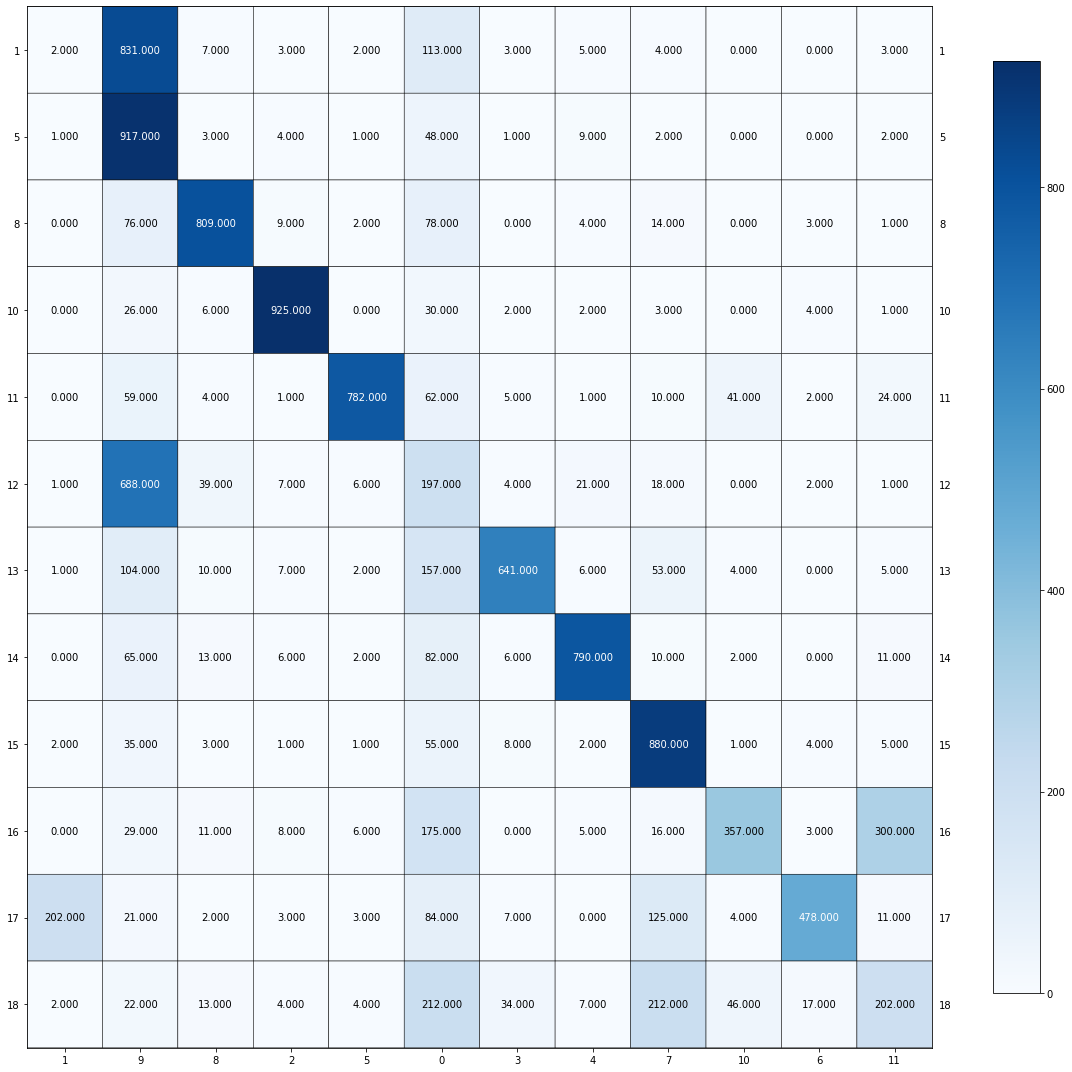

In [ ]:
hdbscan_h = hdbscan.HDBSCAN(min_cluster_size=200, min_samples=1)
y_pred_hdb = hdbscan_h.fit_predict(umap_hdbscan_embedding)
print('contingency matrix for min_cluster_size 200, min_samples 1 (HDBSCAN)')
cm_hdb = contingency_matrix(y11, y_pred_hdb)
rows, cols = linear_sum_assignment(cm_hdb, maximize=True)
plot_mat(cm_hdb[rows[:, np.newaxis], cols], xticklabels=cols, yticklabels=rows, size=(15,15))

In [ ]:
labels = list(hdbscan_h.labels_)
n_noise = labels.count(-1)
n_clusters = len(np.unique(np.array(labels))) - (1 if -1 in labels else 0)

print("Number of Clusters: {}".format(n_clusters)) 
print("Number of Noise: {}".format(n_noise)) 

Number of Clusters: 11
Number of Noise: 2035


Question 17

In [ ]:
!pip install umap-learn[plot]

In [ ]:
!pip install holoviews

In [ ]:
!pip install -U ipykernel

In [ ]:
!pip install hdbscan

In [ ]:
import umap.umap_ as umap

In [ ]:
#dimensional reduction

newsgroups17 = fetch_20newsgroups(subset='train', shuffle = True, remove=('headers', 'footers'), random_state = 42)
# tfidf 
vectorizer = TfidfVectorizer(min_df=3,stop_words='english')
newsgroup17_tfidf = vectorizer.fit_transform(newsgroups17.data)

# svd
svd5 = TruncatedSVD(n_components=5,random_state = 42)
svd20 = TruncatedSVD(n_components=20,random_state = 42)
svd200 = TruncatedSVD(n_components=200,random_state = 42)

svd_trans5 = svd5.fit_transform(newsgroup17_tfidf)
svd_trans20 = svd20.fit_transform(newsgroup17_tfidf)
svd_trans200 = svd200.fit_transform(newsgroup17_tfidf)

#nmf
nmf5 = NMF(n_components = 5, random_state=42, init='random',max_iter = 500)
nmf20 = NMF(n_components = 20, random_state=42, init='random', max_iter = 500)
nmf200 = NMF(n_components = 200, random_state=42, init='random', max_iter = 500)

nmf_trans5 = nmf5.fit_transform(newsgroup17_tfidf)
nmf_trans20 = nmf20.fit_transform(newsgroup17_tfidf)
nmf_trans200 = nmf200.fit_transform(newsgroup17_tfidf)

# umap

umap5 = umap.UMAP(n_components=5, metric="cosine")
umap20 = umap.UMAP(n_components=20, metric="cosine")
umap200 = umap.UMAP(n_components=200, metric="cosine")

umap_trans5 = umap5.fit_transform(newsgroup17_tfidf)
umap_trans20 = umap20.fit_transform(newsgroup17_tfidf)
umap_trans200 = umap200.fit_transform(newsgroup17_tfidf)
# k = [10, 20, 50]
# kmeans = KMeans(n_clusters=k, n_init = 30, max_iter = 1000, random_state=0).fit(newsgroup17_tfidf)

In [ ]:
dimensional_reductions = [newsgroup17_tfidf, 
                          svd_trans5, svd_trans20, svd_trans200,
                          nmf_trans5, nmf_trans20, nmf_trans200,
                          umap_trans5, umap_trans20, umap_trans200]
dimensional_reductions_names = ["no dimensional reductions",
                                "svd(r=5)", "svd(r=20)", "svd(r=200)",
                                "nmf(r=5)", "nmf(r=20)", "nmf(r=200)",
                                "umap(n_components=5)", "umap(n_components=20)", "umap(n_components=200)"
                                ]

In [ ]:
# clustering
from sklearn.cluster import AgglomerativeClustering
import hdbscan

# hyperparameter
k = [10, 20, 50]
n_clusters = [20]
min_cluster_size = [100,200]

#models
scores = {}

#kmeans
for i in k:
    kmeans = KMeans(n_clusters=i, n_init = 30, max_iter = 1000, random_state=0)
    for d in range(len(dimensional_reductions)):
        kmeans.fit(dimensional_reductions[d])
        temp_metrics = five_metrics(newsgroups17.target, kmeans.labels_)
        scores['Kmeans with ' + dimensional_reductions_names[d]] = temp_metrics

# Agglomerative Clustering
for i in n_clusters:
    ac = AgglomerativeClustering(n_clusters = i)
    for d in range(len(dimensional_reductions)):
        if d == 0:
            ac.fit(dimensional_reductions[d].toarray())
        else:
            ac.fit(dimensional_reductions[d])
        temp_metrics = five_metrics(newsgroups17.target, ac.labels_)
        scores['Agglomerative clustering with ' + dimensional_reductions_names[d]] = temp_metrics

# HDBSCAN
for i in min_cluster_size:
    hdb = hdbscan.HDBSCAN(min_cluster_size = i)
    for d in range(len(dimensional_reductions)):
        hdb.fit(dimensional_reductions[d])
        temp_metrics = five_metrics(newsgroups17.target, hdb.labels_)
        scores['HDBSCAN with ' + dimensional_reductions_names[d]] = temp_metrics


In [ ]:
for i in scores:
    scores[i] = scores[i][2]

In [ ]:
best_scores = max(scores.values())
best_model = [i for i in scores if scores[i]== best_scores][0]
best_model


'Agglomerative clustering with umap(n_components=20)'

In [ ]:
print("The best model is the combination of Agglomerative clustering with umap (n_components=20), with a score of", best_scores)

The best model is the combination of Agglomerative clustering with umap (n_components=20), with a score of 0.5770158400101492


In [ ]:
scores

{'Kmeans with no dimensional reductions': 0.4144749035906342,
 'Kmeans with svd(r=5)': 0.3339172503039398,
 'Kmeans with svd(r=20)': 0.4061925338507226,
 'Kmeans with svd(r=200)': 0.38313481703257996,
 'Kmeans with nmf(r=5)': 0.31204952176055245,
 'Kmeans with nmf(r=20)': 0.3544230526177002,
 'Kmeans with nmf(r=200)': 0.25653279441371307,
 'Kmeans with umap(n_components=5)': 0.5575894553895097,
 'Kmeans with umap(n_components=20)': 0.5586649324021667,
 'Kmeans with umap(n_components=200)': 0.5577116945222718,
 'Agglomerative clustering with no dimensional reductions': 0.4192383816882893,
 'Agglomerative clustering with svd(r=5)': 0.31188771841086604,
 'Agglomerative clustering with svd(r=20)': 0.3808309311636155,
 'Agglomerative clustering with svd(r=200)': 0.3782390796306665,
 'Agglomerative clustering with nmf(r=5)': 0.31055925275533114,
 'Agglomerative clustering with nmf(r=20)': 0.3678073997685829,
 'Agglomerative clustering with nmf(r=200)': 0.18080869796587307,
 'Agglomerative cl